In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = [10,11,-23,-12,-34,54,55,66,1023,12,15,18,19,23,12,32,45,10,12,10,15,1300]

In [3]:
df = pd.DataFrame(dataset, dtype='float64')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       22 non-null     float64
dtypes: float64(1)
memory usage: 308.0 bytes


In [5]:
df = df.rename(columns={0:"dp"})

In [6]:
def detect_outliers(x): 
    outliers = []
    threshold = 3 # 3rd std deviation
    mean = np.mean(x)
    std = np.std(x)
    
    for i in x:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers


In [7]:
df.columns

Index(['dp'], dtype='object')

In [8]:
# import numpy as np

# def detect_outliers_z_score(data, threshold=3):
#     outliers = []
#     mean = np.mean(data)
#     std = np.std(data)
#     for i in data:
#         z_score = (i - mean) / std
#         if np.abs(z_score) > threshold:
#             outliers.append(i)
#     return outliers

z_score = xi-mean/std

In [9]:
import numpy as np

def detect_outliers_z_score(data, threshold=3):
    outliers = []
    mean = np.mean(data)
    std = np.std(data)
    for i, x in enumerate(data):
        z_score = (x - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append((i, x))  # Store index and value
    return outliers

# Example usage:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 1000, 1100, 1200]  # Example dataset with outliers
outliers = detect_outliers_z_score(data)
print("Outliers:", outliers)


Outliers: []


In [10]:
import numpy as np

def detect_outliers_z_score(data, threshold=3):
    outliers = []
    mean = np.mean(data)
    std = np.std(data)
    for i, x in enumerate(data):
        z_score = (x - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append((i, x))
    return outliers

# Example usage:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 100, 110, 120]  # Example dataset with outliers (100, 110, 120)
outliers = detect_outliers_z_score(data)
print("Outliers:", outliers)


Outliers: []


In [11]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

# Example data
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3], [8, 8], [9, 8], [9, 9], [10, 9]])

# LOF model
lof = LocalOutlierFactor(n_neighbors=3)  # You can adjust the number of neighbors as needed

# Fit the model and predict outliers
outlier_scores = lof.fit_predict(X)

# The negative LOF scores indicate outliers
outliers = X[outlier_scores == -1]

print("Outliers:")
print(outliers)


Outliers:
[]


In [12]:
from sklearn.cluster import DBSCAN
import numpy as np

# Example data
X = np.array([[1, 2], [2, 2], [2, 3], [8, 7], [8, 8], [25, 80]])

# DBSCAN model
dbscan = DBSCAN(eps=3, min_samples=2)  # You can adjust the eps (maximum distance between two samples) and min_samples parameters as needed

# Fit the model and predict clusters
clusters = dbscan.fit_predict(X)

# The cluster labels (-1 indicates noise/outliers)
print("Cluster labels:", clusters)

# Extract outliers (points with label -1)
outliers = X[clusters == -1]

print("Outliers:")
print(outliers)


Cluster labels: [ 0  0  0  1  1 -1]
Outliers:
[[25 80]]


In [13]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x14c0aeb95d0>,
 'caps': [<matplotlib.lines.Line2D at 0x14c0aebaf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x14c0aea8a10>],
 'medians': [<matplotlib.lines.Line2D at 0x14c0aebc710>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c082a5bd0>],
 'means': []}

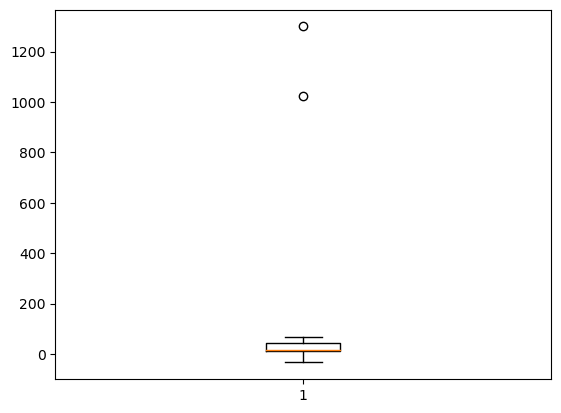

In [14]:
plt.boxplot(x='dp',data=df)